# LECTURE 8 

BLACK-SHOLES MODEL 

In [5]:
# Packages needed 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf            #yahoo finance, to download data straight in the notebook

In [6]:
def euro_option_bs(S, K, T, r, vol, payoff): 
    
#we have 5 inputs 
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    
    #loop for call 
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
        
    #loop for put
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [7]:
euro_option_bs(100, 100, 1, 0.05, 0.25, 'call') 
# numbers are the share prices of the call 

12.335998930368717

In [8]:
S = np.linspace(50,150,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 100, 1, 0.05, 0.25, 'call')
    
#European Call based on stock price

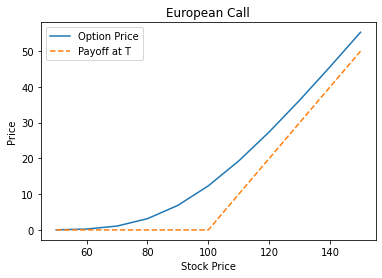

In [9]:

fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-100,0), '--') 
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])


Dividend Paying Options (European option)

In [10]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

#np.exp(-q * T) is the discount factor

In [11]:

euro_option_bsm(100, 100, 1, 0.05, 0.03, 0.25, 'call')

10.549284934339425

In [12]:
T = np.linspace(0.25,3,12)
cpd = np.zeros((len(T),1))
for i in range(len(T)):
    cpd [i] = euro_option_bsm(100, 100, T[i], 0.05, 0.03, 0.25, 'call')

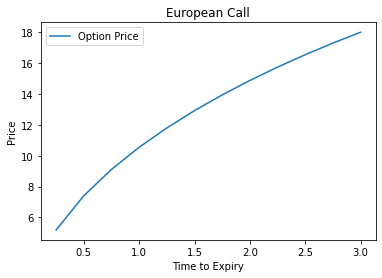

In [13]:
fig = plt.figure()
plt.plot(T, cpd, '-')
plt.xlabel('Time to Expiry')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price'])


OPTION TRADING 

In [14]:

AAPL = yf.Ticker('AAPL')
opt = AAPL.option_chain('2021-12-10') #TIME TO MATURITY 
opt.calls

#DOWNLOADS DATA FROM YAHOO FINANCE 

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL211210C00075000,2021-11-10 20:49:53,75.0,73.10,0.0,0.0,0.0,0.0,NaN,30,0.000010,True,REGULAR,USD
1,AAPL211210C00085000,2021-11-12 15:10:52,85.0,62.85,0.0,0.0,0.0,0.0,2.0,1,0.000010,True,REGULAR,USD
2,AAPL211210C00090000,2021-11-12 18:11:08,90.0,59.65,0.0,0.0,0.0,0.0,2.0,2,0.000010,True,REGULAR,USD
3,AAPL211210C00095000,2021-11-08 17:03:19,95.0,55.33,0.0,0.0,0.0,0.0,10.0,90,0.000010,True,REGULAR,USD
4,AAPL211210C00100000,2021-11-12 17:51:24,100.0,49.75,0.0,0.0,0.0,0.0,2.0,2,0.000010,True,REGULAR,USD
5,AAPL211210C00110000,2021-11-10 15:52:24,110.0,39.17,0.0,0.0,0.0,0.0,NaN,10,0.000010,True,REGULAR,USD
6,AAPL211210C00115000,2021-10-29 19:57:06,115.0,34.90,0.0,0.0,0.0,0.0,2.0,0,0.000010,True,REGULAR,USD
7,AAPL211210C00120000,2021-11-12 14:43:31,120.0,27.95,0.0,0.0,0.0,0.0,1.0,11,0.000010,True,REGULAR,USD
8,AAPL211210C00125000,2021-11-12 15:42:29,125.0,23.67,0.0,0.0,0.0,0.0,1.0,3,0.000010,True,REGULAR,USD
9,AAPL211210C00130000,2021-11-11 18:04:46,130.0,18.33,0.0,0.0,0.0,0.0,1.0,103,0.000010,True,REGULAR,USD


In [15]:
data = yf.download("AAPL", start="2020-11-13", end="2021-11-13")

[*********************100%***********************]  1 of 1 completed


In [16]:
data['Adj Close']

Date
2020-11-13    118.529297
2020-11-16    119.562920
2020-11-17    118.658493
2020-11-18    117.306824
2020-11-19    117.913094
                 ...    
2021-11-08    150.440002
2021-11-09    150.809998
2021-11-10    147.919998
2021-11-11    147.869995
2021-11-12    149.990005
Name: Adj Close, Length: 252, dtype: float64

In [17]:
S = data['Adj Close'][-1] #[-1] MEANS LAST DATA AVAILABLE
K = opt.calls['strike']
T = 4/52
r = 0.0158
q = 0.0059
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
vol = np.sqrt(252) * log_return.std() #VOLATILITY 
vol

0.24729797181635213

In [18]:

AAPL_bsm_call = np.zeros((len(K),1))
for i in range(len(K)):
    AAPL_bsm_call [i] = euro_option_bsm(S, K[i], T, r, q, vol, 'call') #S IS FIXED VALUE ON THE LAST DAY OF TRADING 

In [19]:
opt.calls['BSMPrice'] = pd.DataFrame(AAPL_bsm_call).round(2)
opt.calls

#NEW COLUMN IN THE PREVIOUS DATA FRAME 
#ROUND(2) MEANS IT KEEPS ONLY 2 DECIMALS 

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSMPrice
0,AAPL211210C00075000,2021-11-10 20:49:53,75.0,73.10,0.0,0.0,0.0,0.0,NaN,30,0.000010,True,REGULAR,USD,75.01
1,AAPL211210C00085000,2021-11-12 15:10:52,85.0,62.85,0.0,0.0,0.0,0.0,2.0,1,0.000010,True,REGULAR,USD,65.03
2,AAPL211210C00090000,2021-11-12 18:11:08,90.0,59.65,0.0,0.0,0.0,0.0,2.0,2,0.000010,True,REGULAR,USD,60.03
3,AAPL211210C00095000,2021-11-08 17:03:19,95.0,55.33,0.0,0.0,0.0,0.0,10.0,90,0.000010,True,REGULAR,USD,55.04
4,AAPL211210C00100000,2021-11-12 17:51:24,100.0,49.75,0.0,0.0,0.0,0.0,2.0,2,0.000010,True,REGULAR,USD,50.04
5,AAPL211210C00110000,2021-11-10 15:52:24,110.0,39.17,0.0,0.0,0.0,0.0,NaN,10,0.000010,True,REGULAR,USD,40.06
6,AAPL211210C00115000,2021-10-29 19:57:06,115.0,34.90,0.0,0.0,0.0,0.0,2.0,0,0.000010,True,REGULAR,USD,35.06
7,AAPL211210C00120000,2021-11-12 14:43:31,120.0,27.95,0.0,0.0,0.0,0.0,1.0,11,0.000010,True,REGULAR,USD,30.07
8,AAPL211210C00125000,2021-11-12 15:42:29,125.0,23.67,0.0,0.0,0.0,0.0,1.0,3,0.000010,True,REGULAR,USD,25.08
9,AAPL211210C00130000,2021-11-11 18:04:46,130.0,18.33,0.0,0.0,0.0,0.0,1.0,103,0.000010,True,REGULAR,USD,20.14


In [20]:
opt.calls['estimate_error'] = ((opt.calls['lastPrice'] - opt.calls['BSMPrice'])/opt.calls['BSMPrice'])*100
opt.calls['estimate_error'] 

#NEW COLUMN ESTIMATE ERROR 

0      -2.546327
1      -3.352299
2      -0.633017
3       0.526890
4      -0.579536
5      -2.221667
6      -0.456361
7      -7.050216
8      -5.622010
9      -8.987090
10     -7.431551
11     -9.357653
12     -1.022147
13      1.469238
14     -1.191658
15     -4.633621
16     -1.292597
17     -2.313625
18     -4.661017
19     -6.542056
20    -10.344828
21    -11.324376
22    -13.733906
23    -15.662651
24    -26.728111
25    -32.673267
26    -14.634146
27     13.333333
28    100.000000
29    600.000000
30           inf
31           inf
32           inf
33           inf
34           inf
Name: estimate_error, dtype: float64

In [21]:
#INF MEANS INFINITY BECAUSE 0:0 = INF 
#POSITIVE MEANS OVERVALUE = IF YOU BUY YOU EARN SOME MONEY 
#NEGATIVE MEANS UNDERVALUE = IT MEANS YOU CAN BUY AND WAIT TO SEEL 

In [22]:
opt.calls['estimate_error'].replace([np.inf, -np.inf], np.nan).dropna(axis=0).describe()

count     30.000000
mean      17.344458
std      112.072107
min      -32.673267
25%       -9.265012
50%       -3.992960
75%       -0.730299
max      600.000000
Name: estimate_error, dtype: float64

In [23]:
#Our mean estimation error is 17.34%, with a standard deviation of 112.67% points. 
#Our median is even more promising at around -3.99%. Our standard deviation still seems a bit high.

Text(0.5, 1.0, 'Histogram of Estimate Error')

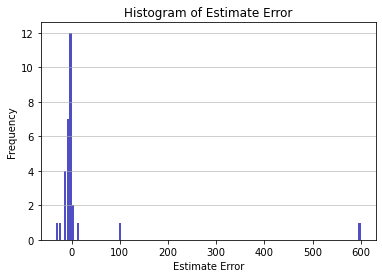

In [24]:
n, bins, patches = plt.hist(x=opt.calls['estimate_error'].replace([np.inf, -np.inf], np.nan).dropna(axis=0), bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estimate Error')
plt.ylabel('Frequency')
plt.title('Histogram of Estimate Error')

INSTALL PACKAGE MIBIAN 

In [25]:
pip install mibian

Note: you may need to restart the kernel to use updated packages.


In [26]:
import mibian as mb

In [28]:
option_100 = mb.BS([S, 100, r*100, 30], volatility = vol*100) 

# Used for pricing European options on stocks without dividends 
# BS([underlyingPrice, strikePrice, interestRate, daysToExpiration], volatility=x, callPrice=y, putPrice=z)

In [29]:
option_100.callPrice

50.11978422826347

In [32]:
option_100d = mb.Me([S, 100, r*100, q*100, 30], volatility = vol*100)

#NOT USING PURE BS
# Used for pricing European options on stocks with dividends
# Me([underlyingPrice, strikePrice, interestRate, annualDividends, daysToExpiration], volatility=x, callPrice=y, putPrice=z)

In [33]:
option_100d.callPrice

50.07129891606769

In [35]:
AAPL_mb_bsm_call = np.zeros((len(K),1))
for i in range(len(K)):
    AAPL_mb_bsm_call [i] = mb.Me([S, K[i], r*100, q*100, 28], volatility = vol*100).callPrice
    
    #28 DAYS

In [36]:
opt.calls['MB_BSMPrice'] = pd.DataFrame(AAPL_mb_bsm_call).round(2)
opt.calls
#CREATES A NEW COLUMN, WITH 2 DECIMALS 

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSMPrice,estimate_error,MB_BSMPrice
0,AAPL211210C00075000,2021-11-10 20:49:53,75.0,73.10,0.0,0.0,0.0,0.0,NaN,30,0.000010,True,REGULAR,USD,75.01,-2.546327,75.04
1,AAPL211210C00085000,2021-11-12 15:10:52,85.0,62.85,0.0,0.0,0.0,0.0,2.0,1,0.000010,True,REGULAR,USD,65.03,-3.352299,65.05
2,AAPL211210C00090000,2021-11-12 18:11:08,90.0,59.65,0.0,0.0,0.0,0.0,2.0,2,0.000010,True,REGULAR,USD,60.03,-0.633017,60.05
3,AAPL211210C00095000,2021-11-08 17:03:19,95.0,55.33,0.0,0.0,0.0,0.0,10.0,90,0.000010,True,REGULAR,USD,55.04,0.526890,55.06
4,AAPL211210C00100000,2021-11-12 17:51:24,100.0,49.75,0.0,0.0,0.0,0.0,2.0,2,0.000010,True,REGULAR,USD,50.04,-0.579536,50.07
5,AAPL211210C00110000,2021-11-10 15:52:24,110.0,39.17,0.0,0.0,0.0,0.0,NaN,10,0.000010,True,REGULAR,USD,40.06,-2.221667,40.08
6,AAPL211210C00115000,2021-10-29 19:57:06,115.0,34.90,0.0,0.0,0.0,0.0,2.0,0,0.000010,True,REGULAR,USD,35.06,-0.456361,35.08
7,AAPL211210C00120000,2021-11-12 14:43:31,120.0,27.95,0.0,0.0,0.0,0.0,1.0,11,0.000010,True,REGULAR,USD,30.07,-7.050216,30.09
8,AAPL211210C00125000,2021-11-12 15:42:29,125.0,23.67,0.0,0.0,0.0,0.0,1.0,3,0.000010,True,REGULAR,USD,25.08,-5.622010,25.11
9,AAPL211210C00130000,2021-11-11 18:04:46,130.0,18.33,0.0,0.0,0.0,0.0,1.0,103,0.000010,True,REGULAR,USD,20.14,-8.987090,20.16


In [37]:
opt.calls['estimate_error_mb'] = ((opt.calls['lastPrice'] - opt.calls['MB_BSMPrice'])/opt.calls['MB_BSMPrice'])*100
opt.calls['estimate_error_mb']

0      -2.585288
1      -3.382014
2      -0.666112
3       0.490374
4      -0.639105
5      -2.270459
6      -0.513113
7      -7.111997
8      -5.734767
9      -9.077381
10     -7.552083
11     -9.501188
12     -1.190476
13      1.283226
14     -1.387512
15     -4.736276
16     -1.524033
17     -2.439024
18     -4.795487
19     -6.687403
20    -10.499139
21    -11.494253
22    -13.918630
23    -15.865385
24    -26.728111
25    -32.673267
26    -14.634146
27     13.333333
28    100.000000
29    600.000000
30           inf
31           inf
32           inf
33           inf
34           inf
Name: estimate_error_mb, dtype: float64

In [38]:
opt.calls['estimate_error_mb'].replace([np.inf, -np.inf], np.nan).dropna(axis=0).describe()

count     30.000000
mean      17.250010
std      112.092325
min      -32.673267
25%       -9.395236
50%       -4.059145
75%       -0.797203
max      600.000000
Name: estimate_error_mb, dtype: float64

Text(0.5, 1.0, 'Histogram of Estimate Error')

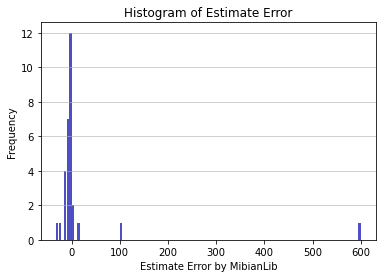

In [39]:
n, bins, patches = plt.hist(x=opt.calls['estimate_error_mb'].replace([np.inf, -np.inf], np.nan).dropna(axis=0), bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estimate Error by MibianLib')
plt.ylabel('Frequency')
plt.title('Histogram of Estimate Error')

Although the mean and median estimation of error have increased, the standard deviation has decreased. Overall, the results is consistent.